# Ligand Similarity Prob Analysis
Plot results from `probability_analysis.py`

In [51]:
DATA_DIR = "/home/jack/unm_gra/data/LAA/Homosapiens-SINGLEPROTEIN-1100/"

## Setup

In [52]:
import polars as pl
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy
from math import comb

## Load data

In [53]:
family_info_df = pl.read_csv(os.path.join(DATA_DIR,"targets/family_addl_info.tsv"), separator="\t")
family_info_df = family_info_df.with_columns((pl.col("short_name").str.to_uppercase()))

In [54]:
LC_PATH_CL4 = os.path.join(DATA_DIR, "family_clusters", "ligand2cluster-class_level=4.tsv")
ligand_cluster_cl4_df = pl.read_csv(LC_PATH_CL4, separator="\t")

In [55]:
ligand_cluster_cl4_df = ligand_cluster_cl4_df.join(family_info_df, on="protein_class_id")

In [56]:
ligand_cluster_cl4_df.head()

molregno,tid,protein_class_id,cluster,parent_id,pref_name,short_name,class_level
i64,i64,i64,i64,i64,str,str,i64
148,10044,158,2,1100,"""Other protein kinase group""","""OTHER""",4
213,10850,1339,8,1100,"""CAMK protein kinase group""","""CAMK""",4
213,10850,1289,4,1100,"""AGC protein kinase group""","""AGC""",4
213,10839,1339,8,1100,"""CAMK protein kinase group""","""CAMK""",4
213,11843,1339,8,1100,"""CAMK protein kinase group""","""CAMK""",4


In [57]:
cluster2name_df = ligand_cluster_cl4_df[["cluster", "short_name"]].unique().sort(by="cluster")
cluster2name_df

cluster,short_name
i64,str
1,"""CMGC"""
2,"""OTHER"""
3,"""TK"""
4,"""AGC"""
5,"""CK1"""
6,"""STE"""
7,"""TKL"""
8,"""CAMK"""
9,"""ATYPICAL"""


## Plots

In [58]:
CLASS_LEVEL = 4

In [59]:
df = pl.read_csv(os.path.join(DATA_DIR, "cluster_stats", f"per_cluster_threshold_analysis_class_level={CLASS_LEVEL}.tsv"), separator="\t")
df = df.join(cluster2name_df, on="cluster")
df

cluster,threshold,conditional_probability,baseline_probability,high_sim_pairs,enrichment_factor,cluster_size,short_name
i64,f64,f64,f64,i64,f64,i64,str
1,0.2,0.020502,0.016261,73603,1.260786,1275,"""CMGC"""
2,0.2,0.006921,0.005284,24848,1.309923,727,"""OTHER"""
3,0.2,0.546986,0.286165,1963689,1.911433,5347,"""TK"""
4,0.2,0.007484,0.006544,26869,1.143713,809,"""AGC"""
5,0.2,0.000015,0.000002,55,9.809878,13,"""CK1"""
…,…,…,…,…,…,…,…
5,0.9,0.000698,0.000002,1,446.839292,13,"""CK1"""
6,0.9,0.015352,0.001804,22,8.51028,425,"""STE"""
7,0.9,0.040475,0.00656,58,6.16979,810,"""TKL"""


In [60]:
cluster_order = ['CK1', 'STE', 'ATYPICAL', 'CAMK', 'AGC', 'TKL', 'CMGC', 'OTHER', 'TK'] # this is just so colors match between plots

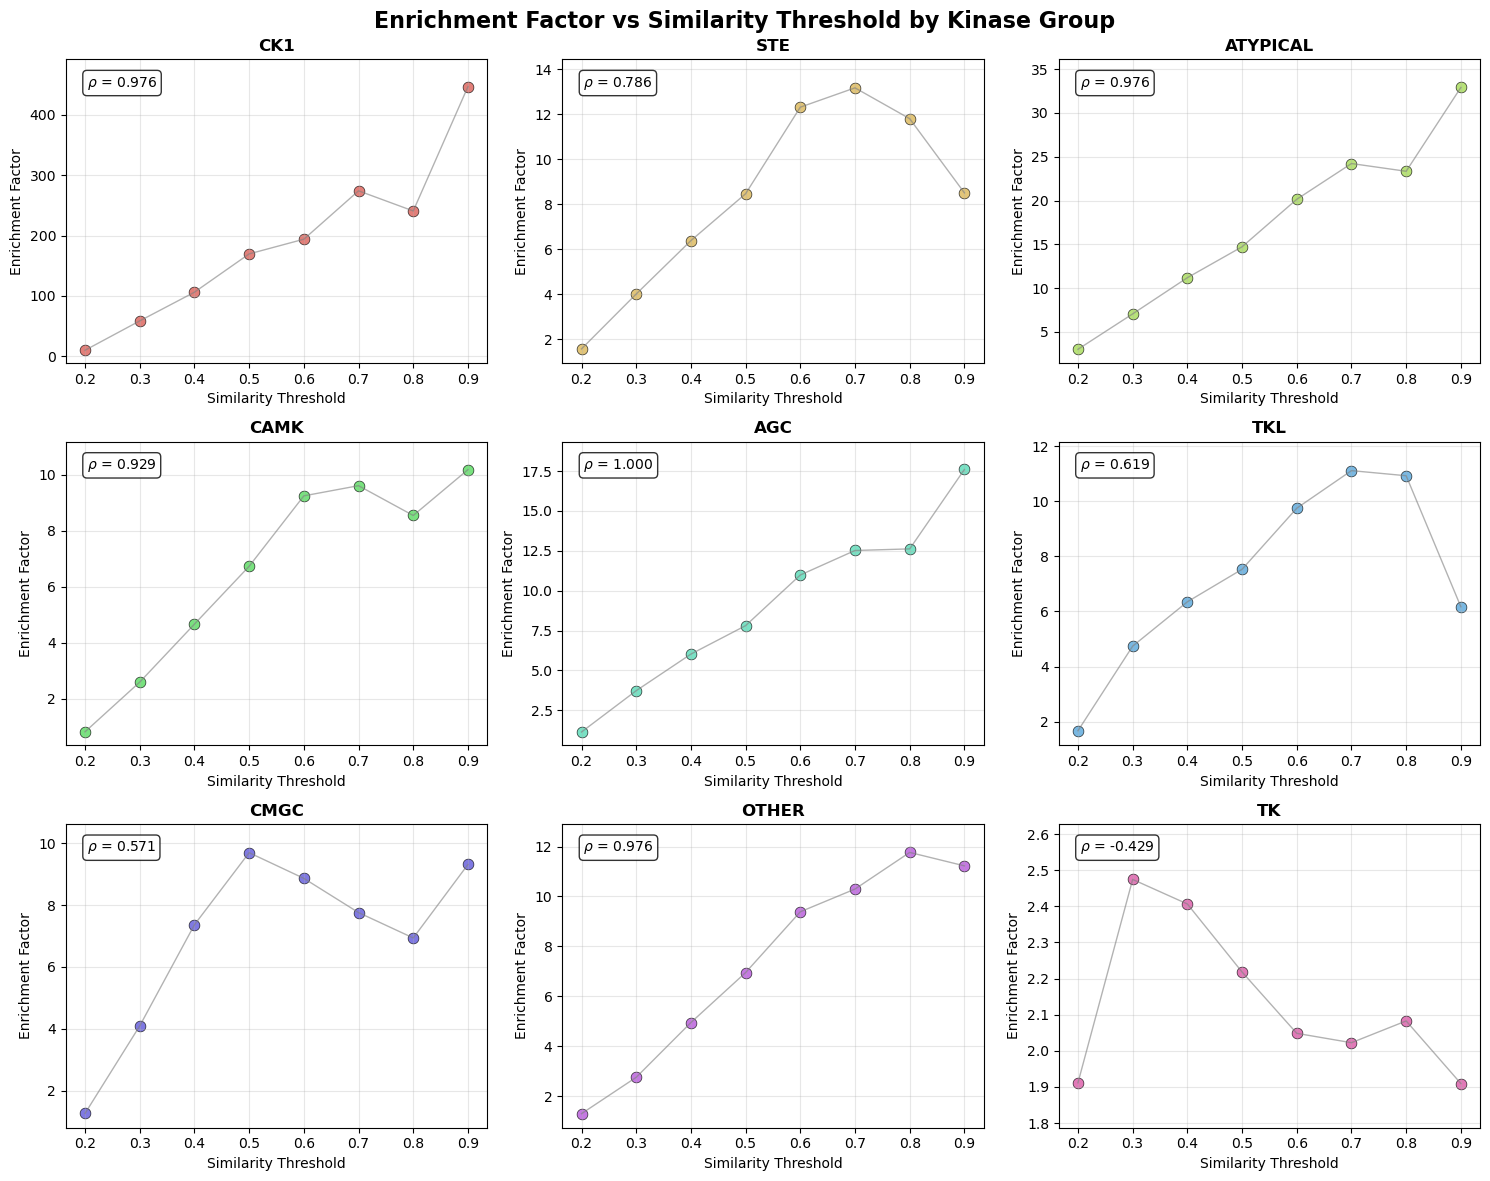

In [ ]:
# TODO: need to add confidence bars to each point here
# maybe bootstrap to calculate enrichment factor in probability_analysis.py?
sns.set_style("whitegrid")
plt.style.use('default')

# Create a 3x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Enrichment Factor vs Similarity Threshold by Kinase Group', fontsize=16, fontweight='bold')

colors = sns.color_palette("hls", len(cluster_order))

# Create plots for each cluster
for i, cluster in enumerate(cluster_order):
    # Calculate subplot position
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    
    # Filter data for this cluster
    cluster_data = df.filter(df['short_name'] == cluster).sort('threshold')
    
    # Create scatter plot with different colors for each threshold
    ax.scatter(cluster_data['threshold'], cluster_data['enrichment_factor'], 
                color=colors[i], s=60, alpha=0.8, edgecolors='black', linewidth=0.5)
    
    # Connect points with a line
    ax.plot(cluster_data['threshold'], cluster_data['enrichment_factor'], 
            color='gray', alpha=0.6, linewidth=1, linestyle='-')
    
    # Customize the subplot
    ax.set_title(f'{cluster}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Similarity Threshold', fontsize=10)
    ax.set_ylabel('Enrichment Factor', fontsize=10)
    ax.grid(True, alpha=0.3)
    
    # Set x-axis to show all threshold values
    ax.set_xticks(sorted(df['threshold'].unique()))
    
    # Add some padding to y-axis
    y_min, y_max = ax.get_ylim()
    ax.set_ylim(y_min * 0.95, y_max * 1.05)

    # add correlation text
    correlation = cluster_data.select(pl.corr('threshold', 'enrichment_factor', method="spearman")).item()
    ax.text(0.05, 0.95, r"$\rho$ " + f"= {correlation:.3f}", 
            transform=ax.transAxes, fontsize=10, 
            verticalalignment='top', horizontalalignment='left',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()
